# Welcome to my Notebook for this Health-Care Dataset!

### I Have covered EDA, and Trained this dataset with the CatBoost Algorithm,which gave the best results after trying many Approach, like using RandomForestClassifier, DecisionTree Algorithms!
### This Notebook includes, Evaluation Metrics like, Accuracy_Score, Confusion_Matrix, ROC and AUC Curves!

## Do Give a "UpVote" if you like this Notebook!, Also share the Genuine Suggestions, in the Comment Section :)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

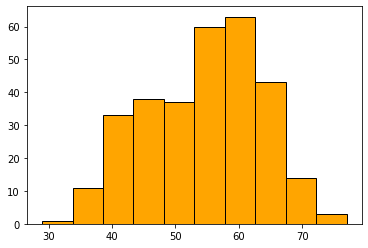

In [5]:
plt.hist(df['age'],facecolor='orange',edgecolor='black',bins=10)

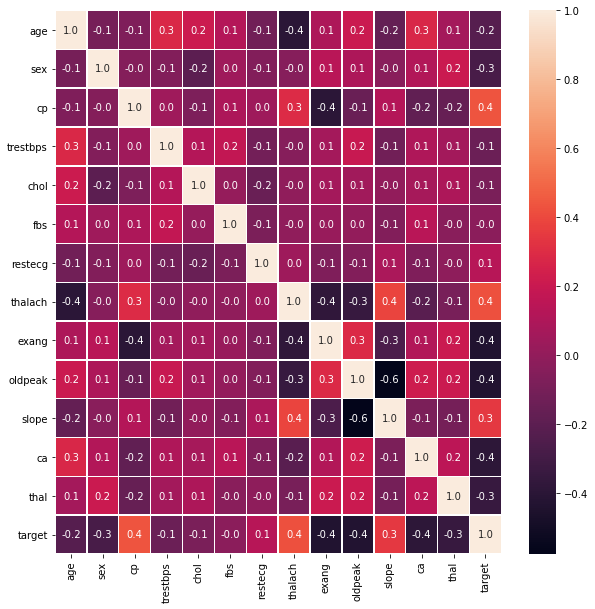

In [6]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

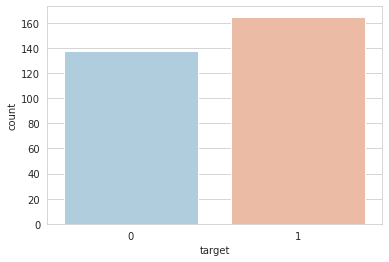

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

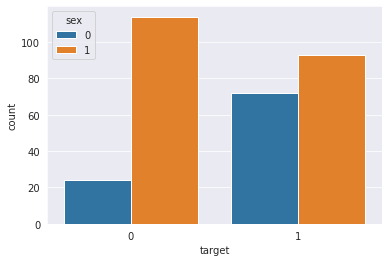

In [8]:
sns.set_style('darkgrid')
sns.countplot(x = 'target', hue = 'sex', data = df)

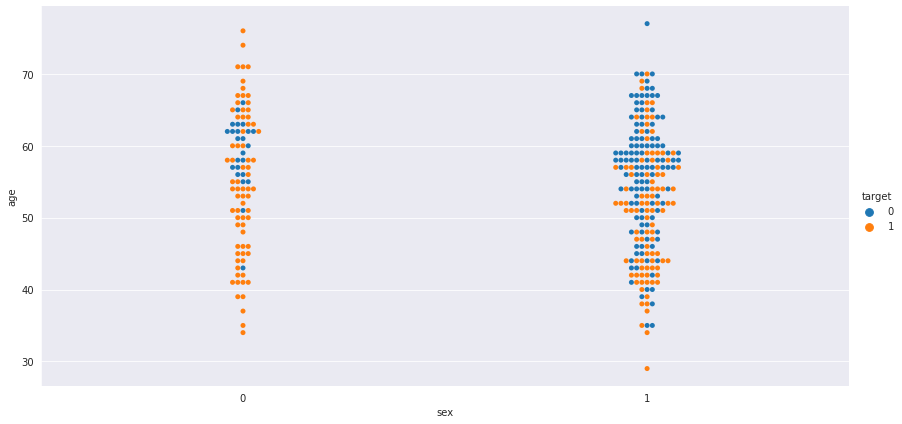

In [9]:
sns.catplot(x="sex", y="age", data=df,kind="swarm",hue='target',height=6,aspect=2)

In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
X=df.drop(['target'],axis=1)
y=df[['target']]

In [12]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [13]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

In [15]:
from catboost import CatBoostClassifier
CB = CatBoostClassifier(iterations=80,eval_metric="F1",
                                    learning_rate=0.30,depth=3)


CB.fit(X_train, y_train,eval_set=(X_test, y_test))

0:	learn: 0.7925926	test: 0.8474576	best: 0.8474576 (0)	total: 53.8ms	remaining: 4.25s
1:	learn: 0.8442907	test: 0.8750000	best: 0.8750000 (1)	total: 54.7ms	remaining: 2.13s
2:	learn: 0.8384880	test: 0.8888889	best: 0.8888889 (2)	total: 55.3ms	remaining: 1.42s
3:	learn: 0.8503401	test: 0.8888889	best: 0.8888889 (2)	total: 55.8ms	remaining: 1.06s
4:	learn: 0.8661972	test: 0.9180328	best: 0.9180328 (4)	total: 56.2ms	remaining: 843ms
5:	learn: 0.8802817	test: 0.9032258	best: 0.9180328 (4)	total: 56.6ms	remaining: 698ms
6:	learn: 0.8780488	test: 0.9354839	best: 0.9354839 (6)	total: 57ms	remaining: 595ms
7:	learn: 0.8771930	test: 0.9032258	best: 0.9354839 (6)	total: 57.4ms	remaining: 517ms
8:	learn: 0.8763251	test: 0.9354839	best: 0.9354839 (6)	total: 57.8ms	remaining: 456ms
9:	learn: 0.8692580	test: 0.9180328	best: 0.9354839 (6)	total: 58.2ms	remaining: 407ms
10:	learn: 0.8732394	test: 0.9032258	best: 0.9354839 (6)	total: 58.6ms	remaining: 368ms
11:	learn: 0.8701754	test: 0.9032258	best: 0

In [16]:
pred = CB.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.9344262295081968
[[28  4]
 [ 0 29]]


In [17]:
y_score1 = CB.predict_proba(X_test)[:,1]

roc_auc_score for Catboost:  0.978448275862069


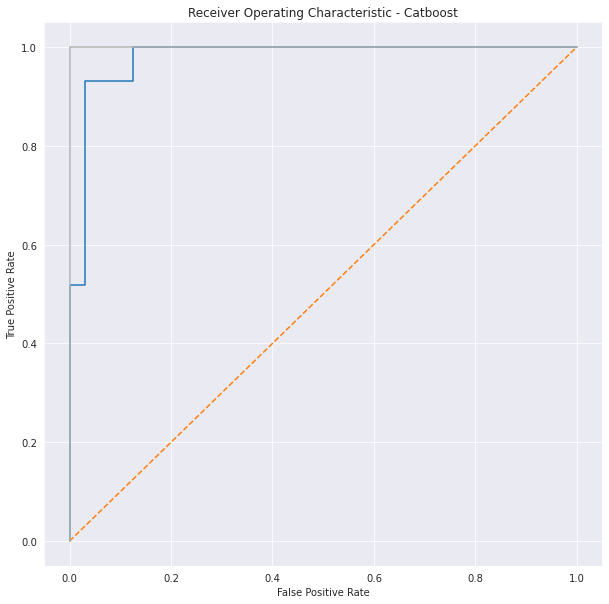

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for Catboost: ', roc_auc_score(y_test, y_score1))

# Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Catboost')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"),plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Thank-you!